# This Notebook is to use the GMM to test the connection between CO2 and Antarctic T

In [2]:
# load the data
data_path='D:/VScode/GMM_carbon/data'

import pandas as pd
# co2 data from Bereiter et al., 2015
co2=pd.read_csv(data_path+'/CO2B15.csv')


# Antarctic T data from Jouzel et al., 2007

with open(data_path+'/Jouzel_etal_2007.txt', 'r', encoding='latin1') as f:
    at = pd.read_csv(f, sep='\s+', skiprows=104)

# rename the columns
at.columns=['Bag', 'ztop', 'Age', 'Deuterium', 'Temperature']

# get the Age and Temperature column
at=at[['Age', 'Temperature']]


In [30]:
at

,Age,Temperature
0,46.81203,1.84
1,55.05624,3.04
2,64.41511,0.35
3,73.15077,-0.42
4,81.93244,0.05
...,...,...
5782,797408.00000,-8.73
5783,798443.00000,-8.54
5784,799501.00000,-8.88
5785,800589.00000,-8.92


In [26]:
co2

,Age,CO2
0,-51.03,368.02
1,-48.00,361.78
2,-46.28,359.65
3,-44.41,357.11
4,-43.08,353.95
...,...,...
1896,803925.28,202.92
1897,804009.87,207.50
1898,804522.67,204.86
1899,805132.44,202.23


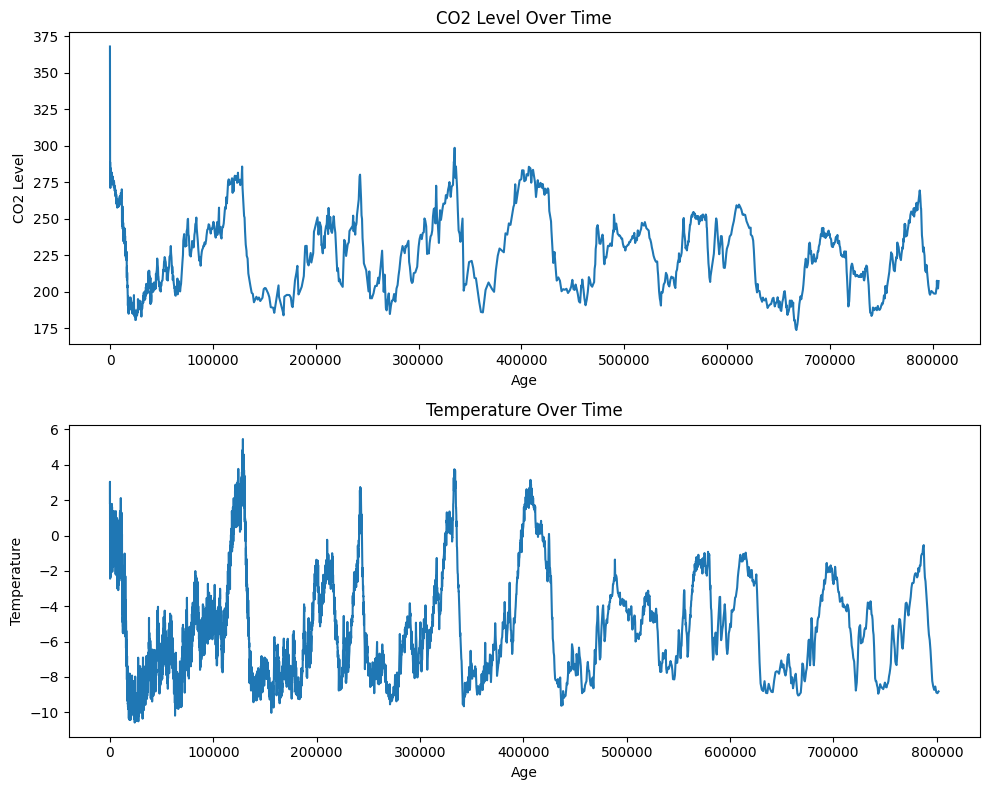

In [27]:
# plot the CO2 and AT
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(10, 8))  # 2 rows, 1 column figure

# Plot for co2 (assuming co2 has columns 'Age' and 'CO2_Level' or equivalent)
axes[0].plot(co2['Age'], co2['CO2'])  # replace 'CO2_Level' with the appropriate column name for CO2 data
axes[0].set_title('CO2 Level Over Time')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('CO2 Level')

# Plot for at
axes[1].plot(at['Age'], at['Temperature'])
axes[1].set_title('Temperature Over Time')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Temperature')

# Automatically adjust the layout
plt.tight_layout()
plt.show()



# plot the distributioin of age gaps

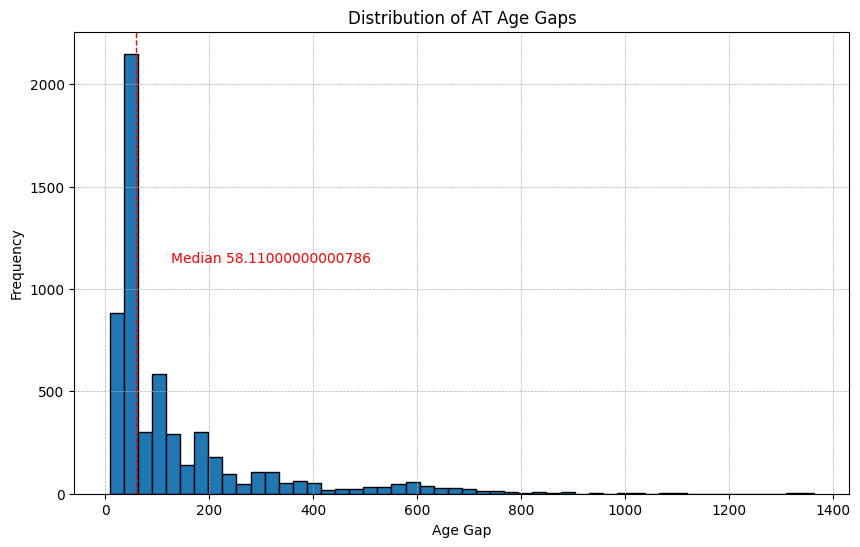

In [39]:
age_gaps = at['Age'].diff().dropna()  # dropna() to remove the first NaN value
median_gap = age_gaps.median()


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(age_gaps, bins=50, edgecolor='black')  # Adjust bins as needed

# Add the vertical line for the median
plt.axvline(median_gap, color='red', linestyle='dashed', linewidth=1)
plt.text(median_gap + 0.05 * max(age_gaps), 0.5 * plt.gca().get_ylim()[1], f'Median {median_gap}', color='red')

plt.title('Distribution of AT Age Gaps')
plt.xlabel('Age Gap')
plt.ylabel('Frequency')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()



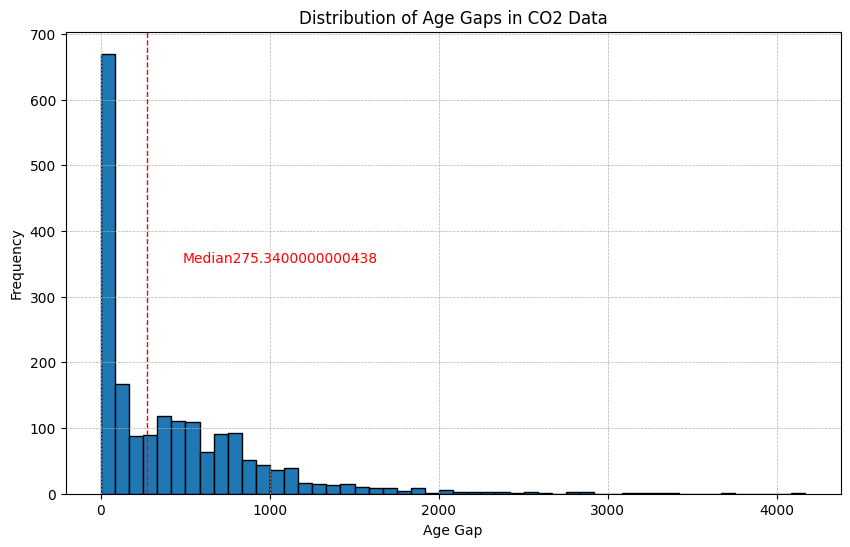

In [44]:
co2_age_gaps = co2['Age'].diff().dropna()
co2_median_gap = co2_age_gaps.median()

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(co2_age_gaps, bins=50, edgecolor='black')

# Add the vertical line for the median
plt.axvline(co2_median_gap, color='red', linestyle='dashed', linewidth=1)
plt.text(co2_median_gap + 0.05 * max(co2_age_gaps), 0.5 * plt.gca().get_ylim()[1], f'Median{co2_median_gap}', color='red')

plt.title('Distribution of Age Gaps in CO2 Data')
plt.xlabel('Age Gap')
plt.ylabel('Frequency')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


# interpolate the data, here I choose 300 as according to the age gap distribution shown above

In [8]:
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d

# Create the vector t
t = np.arange(1000, 800001, 300)

# Interpolating for the 'at' DataFrame
f_at = interp1d(at['Age'], at['Temperature'], kind='linear', fill_value="extrapolate")
temperature_interp = f_at(t)

# Create a new DataFrame for interpolated 'at' values
at_interp = pd.DataFrame({
    'Age': t,
    'Temperature': temperature_interp
})

# Interpolating for the 'co2' DataFrame
f_co2 = interp1d(co2['Age'], co2['CO2'], kind='linear', fill_value="extrapolate")
co2_level_interp = f_co2(t)

# Create a new DataFrame for interpolated 'co2' values
co2_interp = pd.DataFrame({
    'Age': t,
    'CO2': co2_level_interp
})



# visualize the interpolated data to for checking

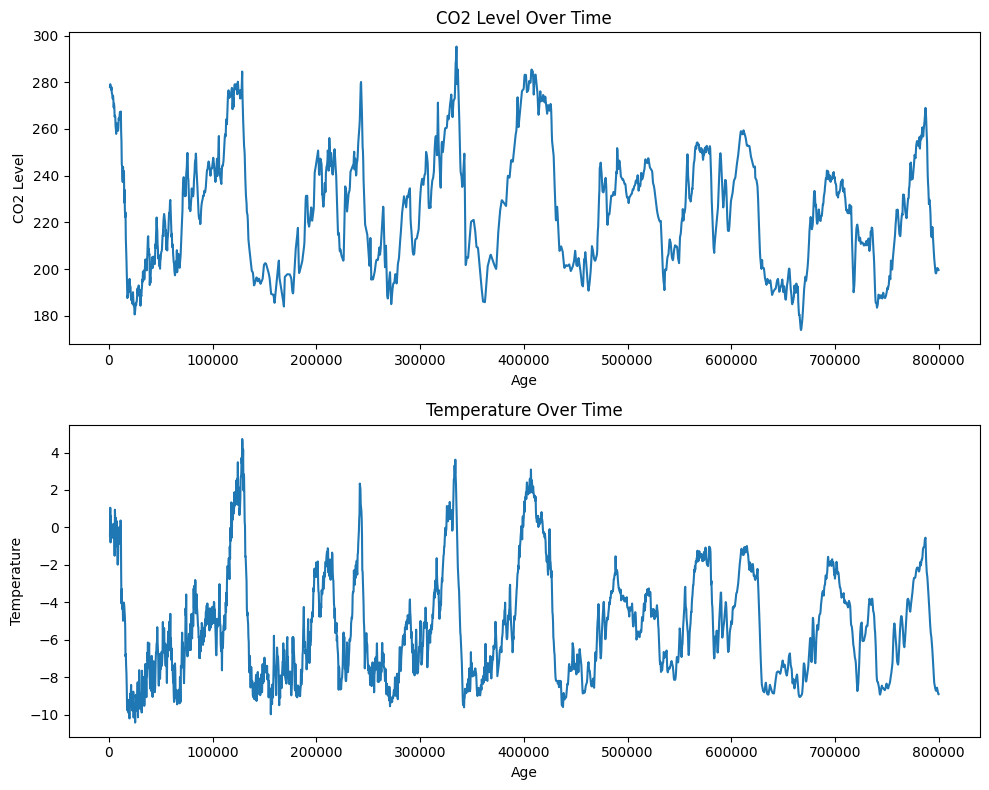

In [9]:
# plot the CO2 and AT
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(10, 8))  # 2 rows, 1 column figure

# Plot for co2 (assuming co2 has columns 'Age' and 'CO2_Level' or equivalent)
axes[0].plot(co2_interp['Age'], co2_interp['CO2'])  # replace 'CO2_Level' with the appropriate column name for CO2 data
axes[0].set_title('CO2 Level Over Time')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('CO2 Level')

# Plot for at
axes[1].plot(at_interp['Age'], at_interp['Temperature'])
axes[1].set_title('Temperature Over Time')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Temperature')

# Automatically adjust the layout
plt.tight_layout()
plt.show()

# make a scatter plot for CO2 and AT

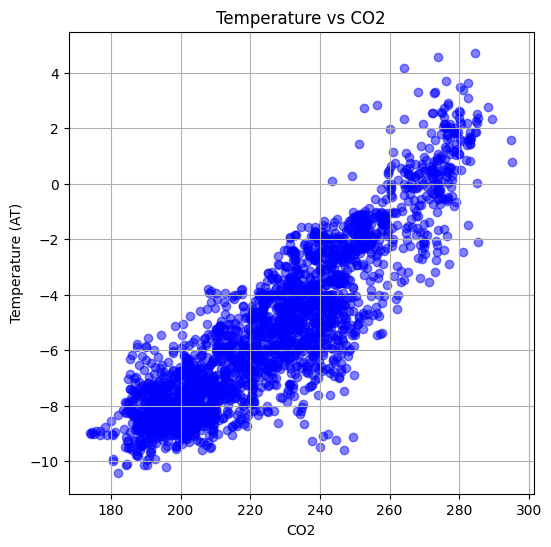

In [11]:
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(6, 6))
plt.scatter(co2_interp['CO2'], at_interp['Temperature'], color='blue', alpha=0.5)
plt.title('Temperature vs CO2')
plt.xlabel('CO2')
plt.ylabel('AT')
plt.grid(True)
plt.show()


# Make a scatter plot for diff(CO2) and diff(AT)

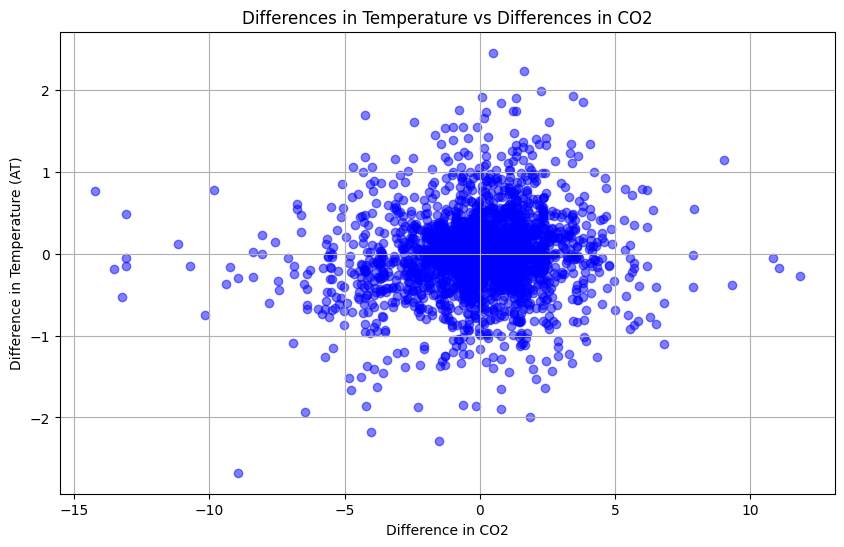

In [13]:
import matplotlib.pyplot as plt

# Calculate the differences
co2_diff = co2_interp['CO2'].diff()
at_diff = at_interp['Temperature'].diff()

# Scatter plot for differences
plt.figure(figsize=(10, 6))
plt.scatter(co2_diff, at_diff, color='blue', alpha=0.5)
plt.title('Differences in Temperature vs Differences in CO2')
plt.xlabel('Difference in CO2')
plt.ylabel('Difference in Temperature (AT)')
plt.grid(True)
plt.show()


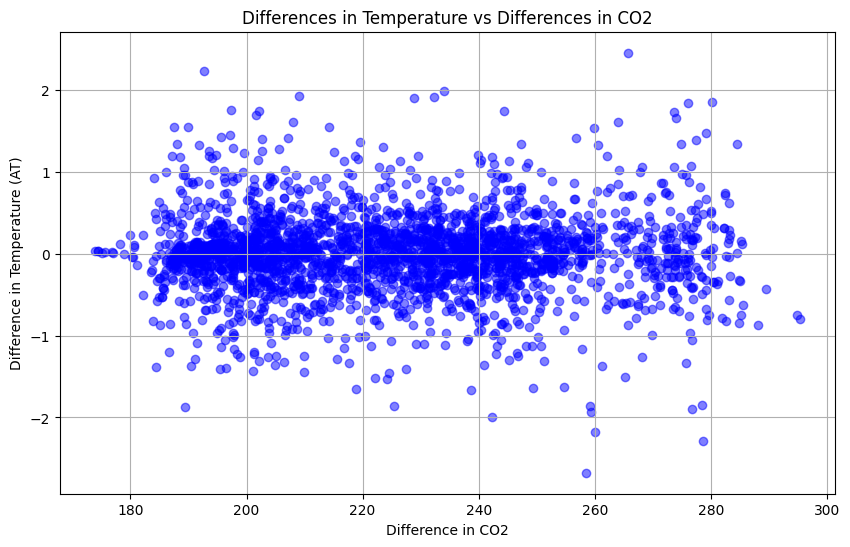

In [14]:
import matplotlib.pyplot as plt

# Calculate the differences

at_diff = at_interp['Temperature'].diff()

# Scatter plot for differences
plt.figure(figsize=(10, 6))
plt.scatter(co2_interp['CO2'], at_diff, color='blue', alpha=0.5)
plt.title('Differences in Temperature vs Differences in CO2')
plt.xlabel('Difference in CO2')
plt.ylabel('Difference in Temperature (AT)')
plt.grid(True)
plt.show()